In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/raw_jobs.csv')
df.head()


Mounted at /content/drive


,Job Title,Company,Location,Summary
0,Data Analyst,ABC Pvt Ltd,Mumbai,We are looking for a data analyst with strong ...
1,Junior Analyst,XYZ Corp,Delhi,"Freshers welcome. Required: Excel, Power BI, d..."
2,Senior Data Lead,DataWorks,Bangalore,"Looking for 5+ years experience with R, SQL, m..."
3,Analyst Intern,AnalyticsNow,Pune,Internship for college students. Must know Pyt...


In [2]:
import re

skills_list = [
    'python', 'sql', 'excel', 'tableau', 'power bi', 'machine learning',
    'statistics', 'communication', 'presentation', 'problem solving',
    'data visualization', 'data analysis', 'r', 'numpy', 'pandas', 'scikit-learn'
]

def extract_skills_regex(text):
    text = text.lower()
    found_skills = set()
    for skill in skills_list:
        if re.search(r'\b' + re.escape(skill) + r'\b', text):
            found_skills.add(skill)
    return list(found_skills)

df['Extracted Skills'] = df['Summary'].apply(extract_skills_regex)
df[['Job Title', 'Company', 'Extracted Skills']].head()


,Job Title,Company,Extracted Skills
0,Data Analyst,ABC Pvt Ltd,"[tableau, sql, python]"
1,Junior Analyst,XYZ Corp,"[data visualization, communication, power bi, ..."
2,Senior Data Lead,DataWorks,"[r, machine learning, sql]"
3,Analyst Intern,AnalyticsNow,"[pandas, problem solving, python, statistics]"


In [3]:
!pip install matplotlib seaborn

/tmp/ipython-input-4-2766233457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')


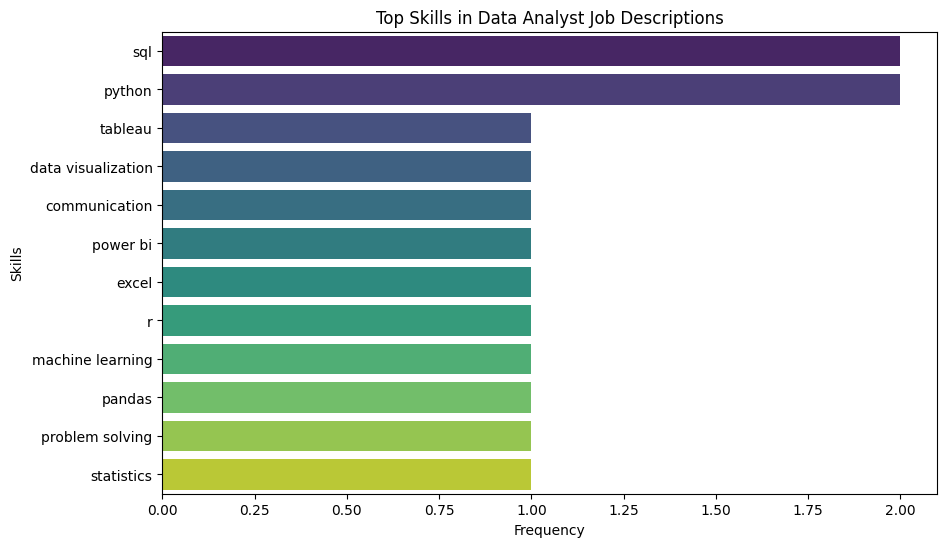

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Flatten all extracted skills into a single list
all_skills = [skill for skills in df['Extracted Skills'] for skill in skills]

# Count frequency of each skill
skill_counts = Counter(all_skills)

# Convert to DataFrame for plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
plt.title('Top Skills in Data Analyst Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.show()


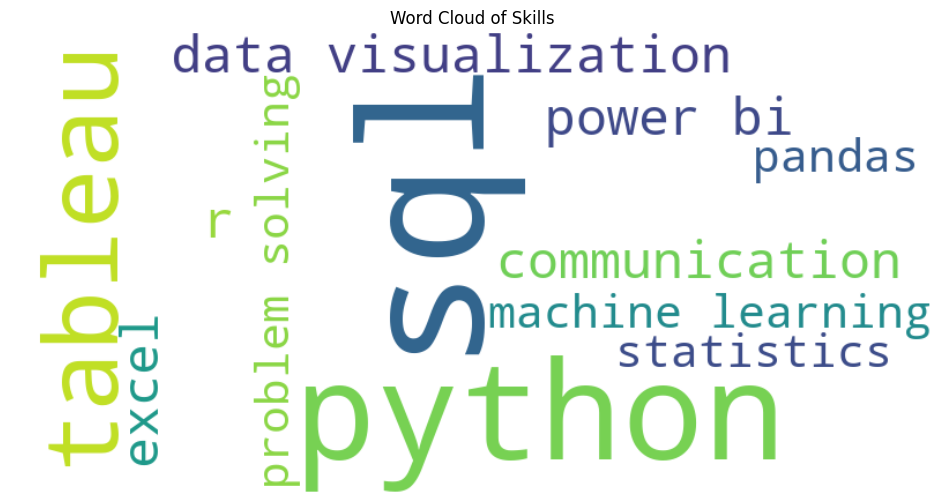

In [5]:
!pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills')
plt.show()


In [6]:
import sqlite3


In [7]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE jobs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    job_title TEXT,
    company TEXT,
    location TEXT,
    summary TEXT,
    extracted_skills TEXT
)
''')

# Insert data into the table
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO jobs (job_title, company, location, summary, extracted_skills)
        VALUES (?, ?, ?, ?, ?)
    ''', (row['Job Title'], row['Company'], row['Location'], row['Summary'], ', '.join(row['Extracted Skills'])))

conn.commit()


In [8]:
for row in cursor.execute('SELECT * FROM jobs LIMIT 5'):
    print(row)


(1, 'Data Analyst', 'ABC Pvt Ltd', 'Mumbai', 'We are looking for a data analyst with strong skills in SQL, Python, and Tableau.', 'tableau, sql, python')
(2, 'Junior Analyst', 'XYZ Corp', 'Delhi', 'Freshers welcome. Required: Excel, Power BI, data visualization and good communication.', 'data visualization, communication, power bi, excel')
(3, 'Senior Data Lead', 'DataWorks', 'Bangalore', 'Looking for 5+ years experience with R, SQL, machine learning and business analytics.', 'r, machine learning, sql')
(4, 'Analyst Intern', 'AnalyticsNow', 'Pune', 'Internship for college students. Must know Python, pandas, problem solving, statistics.', 'pandas, problem solving, python, statistics')


In [9]:
query = """
SELECT COUNT(*) FROM jobs WHERE extracted_skills LIKE '%python%';
"""
cursor.execute(query).fetchone()


(2,)

In [10]:
query = """
SELECT extracted_skills, COUNT(*) as freq
FROM jobs
GROUP BY extracted_skills
ORDER BY freq DESC
LIMIT 5;
"""
cursor.execute(query).fetchall()


[('tableau, sql, python', 1),
 ('r, machine learning, sql', 1),
 ('pandas, problem solving, python, statistics', 1),
 ('data visualization, communication, power bi, excel', 1)]

In [11]:
conn = sqlite3.connect('/content/drive/My Drive/job_skills.db')
# Now it's saved to your Google Drive
